<a href="https://colab.research.google.com/github/Manish1176/Deep-Learning-Project/blob/main/Chest_XRay_Dataset_Prototype_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#!/bin/bash
!kaggle datasets download rishabhrp/chest-x-ray-dataset

Dataset URL: https://www.kaggle.com/datasets/rishabhrp/chest-x-ray-dataset
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 1.34G/1.36G [00:10<00:00, 93.0MB/s]
100% 1.36G/1.36G [00:10<00:00, 138MB/s] 


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/chest-x-ray-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

Chest_XRay_Dataset  chest-x-ray-dataset.zip  kaggle.json  sample_data


In [7]:
# Importing necesary libraries needed in EDA
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

**Loading Dataset**

In [8]:
df = pd.read_csv("/content/Chest_XRay_Dataset/Ground_Truth.csv")
df.head(10)

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
5,00000248_010.png,Atelectasis,248,87,M,AP
6,00000248_011.png,No Finding,248,87,M,AP
7,00000248_012.png,No Finding,248,87,M,PA
8,00000248_013.png,Mass,248,87,M,AP
9,00000248_014.png,Effusion|Pleural_Thickening,248,87,M,AP


In [9]:
df.shape

(111010, 6)

In [10]:
df['Finding Labels'].value_counts()

,count
Finding Labels,
No Finding,59932
Infiltration,9468
Atelectasis,4175
Effusion,3883
Nodule,2686
...,...
Infiltration|Nodule|Pleural_Thickening|Pneumothorax,1
Atelectasis|Cardiomegaly|Effusion|Infiltration|Pneumothorax,1
Infiltration|Mass|Pleural_Thickening|Pneumonia,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111010 entries, 0 to 111009
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     111010 non-null  object
 1   Finding Labels  111010 non-null  object
 2   Patient ID      111010 non-null  int64 
 3   Patient Age     111010 non-null  int64 
 4   Patient Gender  111010 non-null  object
 5   View Position   111010 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.1+ MB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Image Index'].duplicated().sum()

np.int64(0)

In [14]:
df.isnull().sum()

,0
Image Index,0
Finding Labels,0
Patient ID,0
Patient Age,0
Patient Gender,0
View Position,0


In [15]:
df.describe()

,Patient ID,Patient Age
count,111010.000000,111010.000000
mean,14476.875336,46.475254
std,8330.843286,16.570118
min,248.000000,0.000000
25%,7523.000000,34.000000
50%,14078.000000,48.000000
75%,20726.000000,59.000000
max,30805.000000,95.000000


In [16]:
df

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
...,...,...,...,...,...,...
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


In [17]:
df_value_count=df['Finding Labels'].value_counts()
df_value_count

,count
Finding Labels,
No Finding,59932
Infiltration,9468
Atelectasis,4175
Effusion,3883
Nodule,2686
...,...
Infiltration|Nodule|Pleural_Thickening|Pneumothorax,1
Atelectasis|Cardiomegaly|Effusion|Infiltration|Pneumothorax,1
Infiltration|Mass|Pleural_Thickening|Pneumonia,1


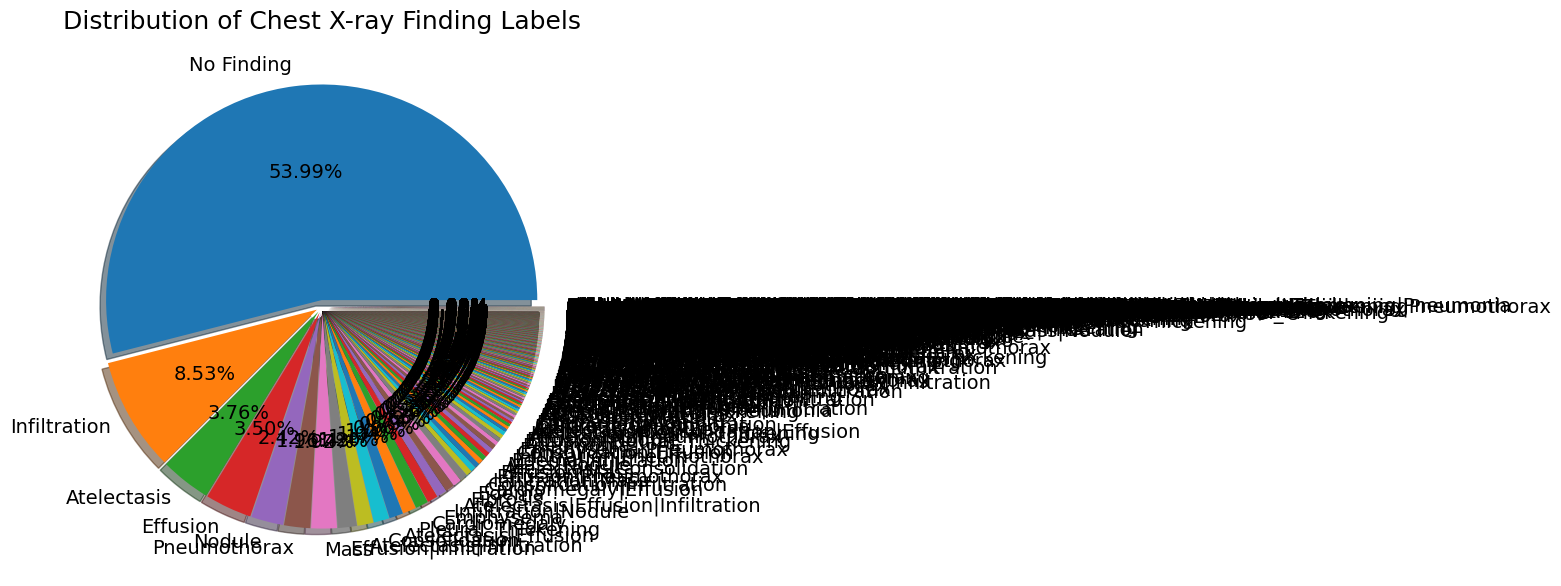

In [18]:
import matplotlib.pyplot as plt

# Count frequency of each finding label
df_value_count = df['Finding Labels'].value_counts()

# Plot pie chart
df_value_count.plot.pie(
    explode=[0.03] * len(df_value_count),   # Slight explode for all slices
    autopct='%1.2f%%',
    shadow=True,
    figsize=(10, 7),
    fontsize=14
)

plt.title('Distribution of Chest X-ray Finding Labels', fontsize=18)
plt.ylabel('')  # Removes default y-axis label
plt.show()


In [55]:
df['Labels'] = df['Finding Labels'].apply(lambda x: 0 if x == 'No Finding' else 1)
df.head(10)

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position,Label,image_path,Labels
30,00000250_006.png,No Finding,250,49,M,AP,0,/content/Chest_XRay_Dataset/xray_images/000002...,0
31,00000250_007.png,Infiltration,250,49,M,AP,1,/content/Chest_XRay_Dataset/xray_images/000002...,1
32,00000250_008.png,Effusion,250,49,M,AP,1,/content/Chest_XRay_Dataset/xray_images/000002...,1
33,00000250_009.png,No Finding,250,49,M,AP,0,/content/Chest_XRay_Dataset/xray_images/000002...,0
34,00000250_010.png,Consolidation|Effusion,250,49,M,PA,1,/content/Chest_XRay_Dataset/xray_images/000002...,1
35,00000250_011.png,No Finding,250,49,M,PA,0,/content/Chest_XRay_Dataset/xray_images/000002...,0
36,00000250_012.png,No Finding,250,50,M,AP,0,/content/Chest_XRay_Dataset/xray_images/000002...,0
37,00000250_013.png,No Finding,250,50,M,AP,0,/content/Chest_XRay_Dataset/xray_images/000002...,0
38,00000250_014.png,Infiltration|Mass,250,52,M,PA,1,/content/Chest_XRay_Dataset/xray_images/000002...,1
39,00000250_015.png,Mass,250,52,M,PA,1,/content/Chest_XRay_Dataset/xray_images/000002...,1


In [20]:
df_label_counts=df['Labels'].value_counts()

In [21]:
df_label_counts

,count
Labels,
0,59932
1,51078


<Axes: ylabel='count'>

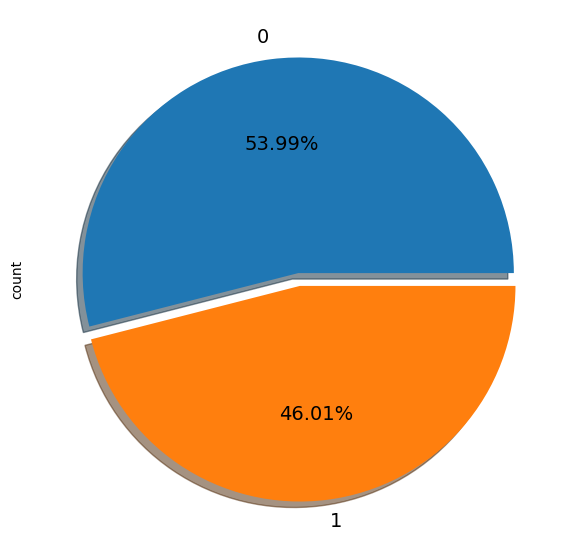

In [22]:
# Count frequency of each finding label
df_label_counts = df['Labels'].value_counts()

# Plot pie chart
df_label_counts.plot.pie(
    explode=[0.03] * len(df_label_counts),   # Slight explode for all slices
    autopct='%1.2f%%',
    shadow=True,
    figsize=(10, 7),
    fontsize=14
)


In [23]:
df_binary = df[df['Labels'].isin([0, 1])]
df_binary

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position,Labels
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP,1
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP,1
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP,1
3,00000248_008.png,Atelectasis,248,87,M,AP,1
4,00000248_009.png,Atelectasis,248,87,M,AP,1
...,...,...,...,...,...,...,...
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA,1
111006,00030802_000.png,No Finding,30802,28,M,PA,0
111007,00030803_000.png,No Finding,30803,42,F,PA,0
111008,00030804_000.png,No Finding,30804,29,F,PA,0


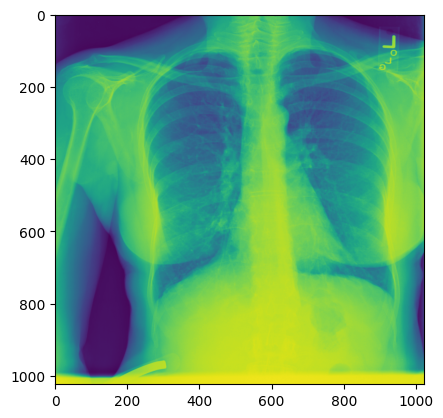

In [25]:
import matplotlib.image as mpimg

img = mpimg.imread('/content/00000255_000.png')
imgplot = plt.imshow(img)
plt.show()

In [26]:
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [27]:
IMG_SIZE = 224
IMAGE_FOLDER = "/content/Chest_XRay_Dataset/xray_images"
CSV_PATH = "/content/Chest_XRay_Dataset/Ground_Truth.csv"

In [28]:
# Count total image files in dataset folder
all_files = os.listdir(IMAGE_FOLDER)
print(f"Total image files in dataset folder: {len(all_files)}")
df = pd.read_csv(CSV_PATH)
df['Label'] = df['Finding Labels'].apply(lambda x: 0 if x == 'No Finding' else 1)
df['image_path'] = df['Image Index'].apply(lambda x: os.path.join(IMAGE_FOLDER, x.strip()))

Total image files in dataset folder: 3710


In [29]:
# Filter only images that actually exist
from itertools import chain
image_extensions = ['*.png', '*.jpg', '*.jpeg', '*.JPG', '*.JPEG']
existing_paths = set(chain.from_iterable(glob(os.path.join(IMAGE_FOLDER, ext)) for ext in image_extensions))
df = df[df['image_path'].isin(existing_paths)]

print(f"Total images found: {len(df)}")

Total images found: 3681


In [30]:
# Count label distribution among found images
label_counts = df['Label'].value_counts()
print("Label 0 count:", label_counts.get(0, 0))
print("Label 1 count:", label_counts.get(1, 0))

Label 0 count: 2133
Label 1 count: 1548


In [33]:
from PIL import Image

data = []
labels = []

for idx, row in df.iterrows():
    image_path = row['image_path']
    label = row['Label']
    try:
        image = Image.open(image_path).convert('L')  # grayscale
        image = image.resize((IMG_SIZE, IMG_SIZE))
        image = np.array(image) / 255.0
        image = np.expand_dims(image, axis=-1)
        data.append(image)
        labels.append(label)
    except Exception as e:
        print(f"Error loading {image_path}: {e}")

X = np.array(data)
y = to_categorical(np.array(labels), num_classes=2)

In [34]:
data[0]

array([[[0.01176471],
        [0.01176471],
        [0.00784314],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.01176471],
        [0.01176471],
        [0.00784314],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.01176471],
        [0.00784314],
        [0.00784314],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       ...,

       [[0.21176471],
        [0.28627451],
        [0.3254902 ],
        ...,
        [0.00784314],
        [0.00784314],
        [0.00784314]],

       [[0.22745098],
        [0.30196078],
        [0.3372549 ],
        ...,
        [0.00784314],
        [0.00784314],
        [0.00784314]],

       [[0.21568627],
        [0.28627451],
        [0.31764706],
        ...,
        [0.00784314],
        [0.00784314],
        [0.00784314]]])

In [36]:
type(X)

numpy.ndarray

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,642 (42.60 MB)

 Trainable params: 11,168,642 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.5502 - loss: 0.8543 - val_accuracy: 0.6136 - val_loss: 0.6608
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5763 - loss: 0.6785 - val_accuracy: 0.6136 - val_loss: 0.6537
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5775 - loss: 0.6777 - val_accuracy: 0.6373 - val_loss: 0.6573
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5883 - loss: 0.6729 - val_accuracy: 0.6271 - val_loss: 0.6479
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6135 - loss: 0.6631 - val_accuracy: 0.6237 - val_loss: 0.6526
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6191 - loss: 0.6593 - val_accuracy: 0.6102 - val_loss: 0.6334
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6408 - loss: 0.6352 - val_accuracy: 0.6339 - val_loss: 0.6333
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6575 - loss: 0.6167 - val_accuracy: 0.6305 -

In [40]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6333 - loss: 0.6875

Test Accuracy: 61.19%


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       427
           1       0.57      0.32      0.41       310

    accuracy                           0.61       737
   macro avg       0.60      0.57      0.56       737
weighted avg       0.60      0.61      0.58       737

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6333 - loss: 0.6875
Test Accuracy: 61.19%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


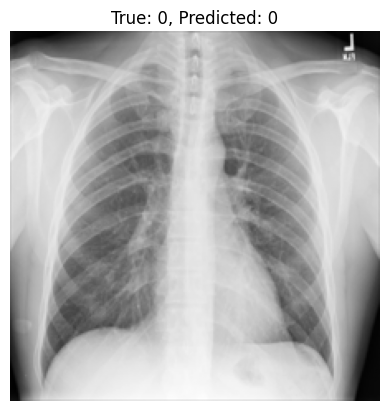

In [51]:
# Pick a test image from your X_test
from matplotlib import pyplot as plt

sample_idx = 356
test_img = X_test[sample_idx]
true_label = np.argmax(y_test[sample_idx])

# Predict
pred = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred)

plt.imshow(test_img.squeeze(), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis(False)
plt.show()


Path of the Chest X-ray image to be predicted: /content/00000250_007.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


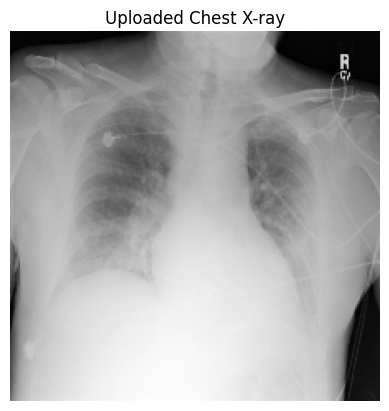

Raw Prediction (probabilities): [[0.65936255 0.34063742]]
Predicted Class: 0
The X-ray indicates **Normal (no finding)**


In [57]:
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Load the best saved model (Not needed in same session, already in memory)
# model = load_model("best_model.h5")

# Path input and predict
input_image_path = input("Path of the Chest X-ray image to be predicted: ")
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

if input_image is None:
    print("Image not found. Check the path.")
else:
    input_image_resized = cv2.resize(input_image, (224, 224))
    input_image_normalized = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_normalized, [1, 224, 224, 1])

    # Predict
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    # Show uploaded image using matplotlib for Colab compatibility
    plt.imshow(input_image_resized, cmap='gray')
    plt.title("Uploaded Chest X-ray")
    plt.axis('off')
    plt.show()

    print(f"Raw Prediction (probabilities): {input_prediction}")
    print(f"Predicted Class: {input_pred_label}")

    if input_pred_label == 1:
        print("The X-ray indicates **Abnormal (disease present)**")
    else:
        print("The X-ray indicates **Normal (no finding)**")
